# Regression

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt

from IPython.display import Image

In [2]:
import pandas as pd

df = pd.read_csv('housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Linear Regression

In [15]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


## Lasso & Ridge &ElasticNet

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [20]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.926, test: 28.876
R^2 train: 0.753, test: 0.653


In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [23]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

## Decision tree

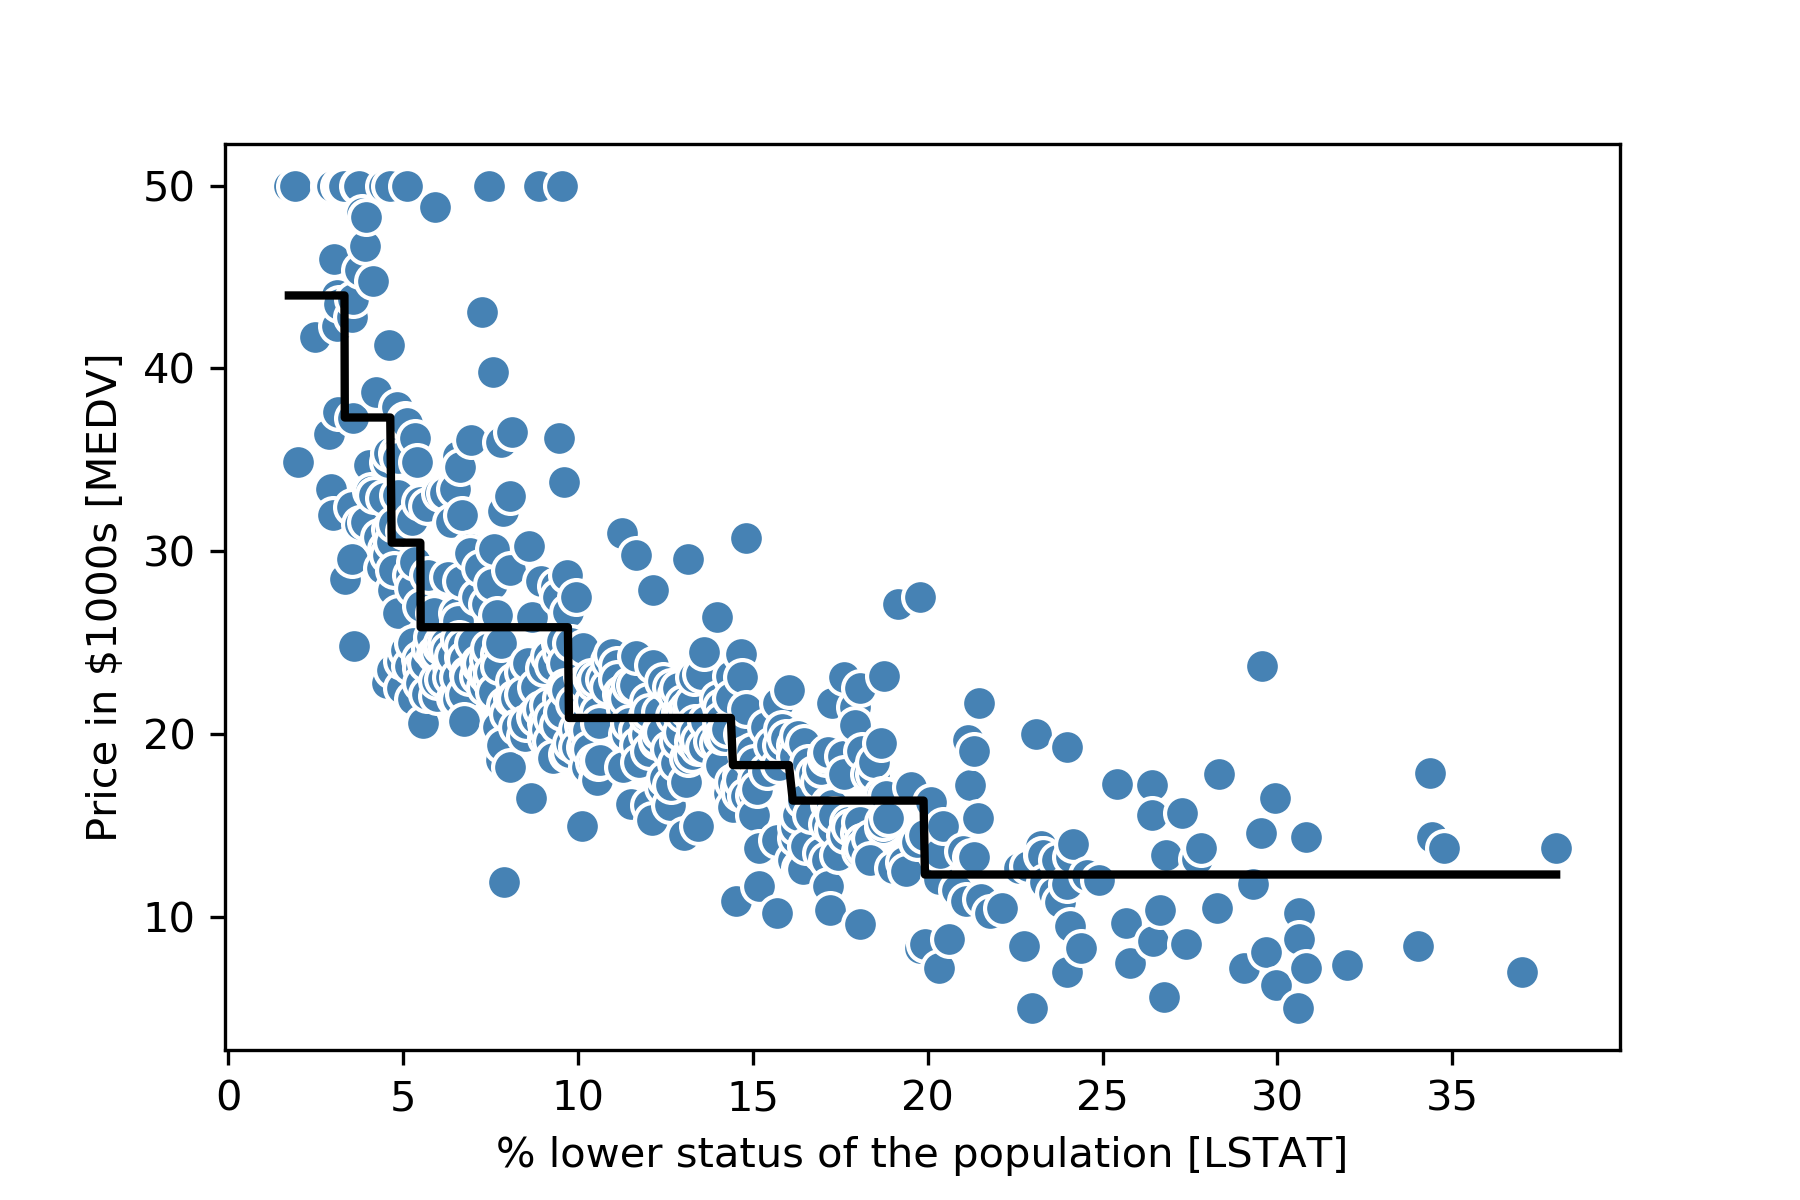

In [27]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

Image('images/10_14.png', width=700)

## Random forest regression

In [28]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.644, test: 11.085
R^2 train: 0.979, test: 0.877


## KNN

In [32]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

for n_neighbors in np.arange(2, 30):
    model = KNeighborsRegressor(n_neighbors=n_neighbors, metric="euclidean", n_jobs=-1)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print('MSE train: %.3f, test: %.3f' % (
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))
    print('R^2 train: %.3f, test: %.3f' % (
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))
    print("-"*30)

MSE train: 10.938, test: 53.672
R^2 train: 0.863, test: 0.406
------------------------------
MSE train: 17.070, test: 53.867
R^2 train: 0.787, test: 0.404
------------------------------
MSE train: 20.008, test: 56.284
R^2 train: 0.750, test: 0.377
------------------------------
MSE train: 24.771, test: 54.154
R^2 train: 0.690, test: 0.400
------------------------------
MSE train: 26.739, test: 52.442
R^2 train: 0.666, test: 0.419
------------------------------
MSE train: 29.638, test: 50.741
R^2 train: 0.630, test: 0.438
------------------------------
MSE train: 32.344, test: 49.114
R^2 train: 0.596, test: 0.456
------------------------------
MSE train: 33.346, test: 50.546
R^2 train: 0.583, test: 0.440
------------------------------
MSE train: 35.641, test: 50.441
R^2 train: 0.555, test: 0.441
------------------------------
MSE train: 36.912, test: 51.695
R^2 train: 0.539, test: 0.428
------------------------------
MSE train: 38.174, test: 52.489
R^2 train: 0.523, test: 0.419
--------